# Movies Recommendation System

### Importing the Libraries

In [ ]:
# Import necessary libraries
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced data visualization
from scipy import stats  # For statistical computations
from ast import literal_eval  # To safely evaluate strings containing Python literals
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer  # For text vectorization
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity  # For similarity computation
from nltk.stem.snowball import SnowballStemmer  # For stemming
from nltk.stem.wordnet import WordNetLemmatizer  # For lemmatization
from nltk.corpus import wordnet  # For working with WordNet
from surprise import Reader, Dataset, SVD, KNNBasic  # For collaborative filtering
from surprise.model_selection import cross_validate, train_test_split  # For evaluating recommender models
from surprise import accuracy
from sklearn.metrics import precision_recall_curve
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from wordcloud import WordCloud

# Set Pandas options for better display
pd.options.display.max_columns = None

# Suppress warnings for a cleaner output
import warnings
warnings.simplefilter('ignore')

# Enable inline plotting for Matplotlib
%matplotlib inline

In [ ]:
!pip install scikit-surprise

python(53953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


**Reading the Larger Dataset**

In [ ]:
meta = pd. read_csv('MoviesDataset/movies_metadata.csv')
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


**Let's identify the total number of null values in the data:**

In [ ]:
meta.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

**Cleaning the Dataset**

In [ ]:
meta['genres'] = meta['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
meta['production_companies']= meta['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
meta['production_countries'] = meta['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
meta['spoken_languages'] = meta['spoken_languages'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
meta['year'] = pd.to_datetime(meta['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [ ]:
import plotly.express as px

# Genre Treemap
genre_counts = pd.Series(all_genres).value_counts().reset_index()
genre_counts.columns = ['Genre', 'Frequency']
fig = px.treemap(genre_counts, path=['Genre'], values='Frequency', title="Genre Distribution")
fig.show()

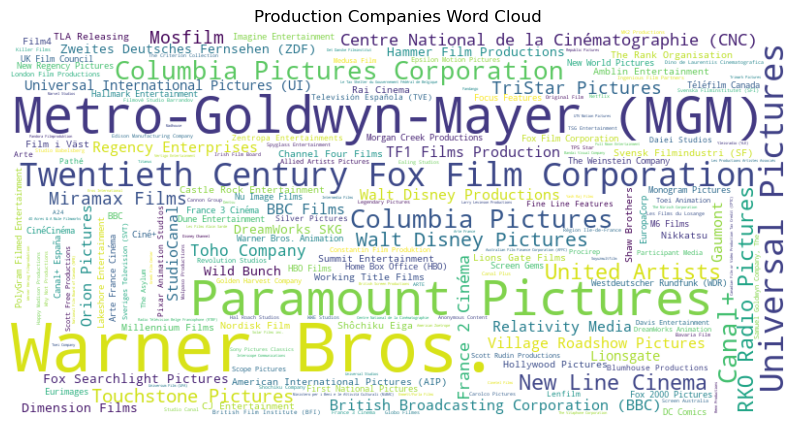

In [ ]:
# For production companies (similarly)

company_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(company_counts)
plt.figure(figsize=(10, 6))
plt.imshow(company_wordcloud, interpolation='bilinear')
plt.title('Production Companies Word Cloud')
plt.axis('off')
plt.show()

In [ ]:
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,False,7.7,5415.0,1995
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,101.0,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,[English],Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,[English],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995


# Genre based Recommendation

The Simple Recommender offers generalized recommnendations to every user based on movie popularity and (sometimes) genre. The basic idea behind this recommender is that movies that are more popular and more critically acclaimed will have a higher probability of being liked by the average audience. This model does not give personalized recommendations based on the user.

The implementation of this model is extremely trivial. All we have to do is sort our movies based on ratings and popularity and display the top movies of our list. As an added step, we can pass in a genre argument to get the top movies of a particular genre.

### One-Hot Encode Genres and Generate Association Rules (Apriori algorithm)

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Convert to one-hot encoding
from sklearn.preprocessing import MultiLabelBinarizer

#Treat genres as transactions
genre_transactions = meta['genres']

mlb = MultiLabelBinarizer()
genre_one_hot = pd.DataFrame(mlb.fit_transform(genre_transactions),
                             columns=mlb.classes_,
                             index=meta.index)

# Generate frequent itemsets
frequent_itemsets = apriori(genre_one_hot, min_support=0.02, use_colnames=True)

# Derive association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0, num_itemsets=1)
rules.sort_values(by='lift', ascending=False, inplace=True)

rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
40,"(Drama, Thriller)",(Crime),0.025821,0.342574,3.616312
41,(Crime),"(Drama, Thriller)",0.025821,0.272580,3.616312
30,(Thriller),(Mystery),0.032882,0.196091,3.613898
31,(Mystery),(Thriller),0.032882,0.605999,3.613898
0,(Action),(Adventure),0.038116,0.262735,3.416908
1,(Adventure),(Action),0.038116,0.495709,3.416908
15,(Thriller),(Crime),0.044341,0.264428,2.791384
14,(Crime),(Thriller),0.044341,0.468075,2.791384
38,"(Crime, Drama)",(Thriller),0.025821,0.464950,2.772749
43,(Thriller),"(Crime, Drama)",0.025821,0.153987,2.772749


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# One-hot encoding of genres
mlb = MultiLabelBinarizer()
genre_one_hot = pd.DataFrame(mlb.fit_transform(meta['genres']),
                             columns=mlb.classes_, index=meta.index)

# Apriori algorithm for frequent itemsets
frequent_itemsets = apriori(genre_one_hot, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=1)

In [ ]:
# Recommend genres based on user preferences
def recommend_genres(preferred_genres, rules):
    recommended = set()
    for genre in preferred_genres:
        matches = rules[rules['antecedents'].apply(lambda x: genre in x)]
        for _, row in matches.iterrows():
            recommended.update(row['consequents'])
    return recommended - set(preferred_genres)

# Example
user_preferred_genres = {'Action', 'Adventure'}
recommended_genres = recommend_genres(user_preferred_genres, rules)
print(f"Recommended genres: {recommended_genres}")

Recommended genres: {'Crime', 'Science Fiction', 'Thriller'}


### Filter Movies by Recommended Genres

In [ ]:
# Filter top movies based on recommended genres
def filter_movies_by_genre(meta, recommended_genres):
    return meta[meta['genres'].apply(lambda x: bool(set(x) & recommended_genres))]

filtered_movies = filter_movies_by_genre(meta, recommended_genres)
filtered_movies[['title', 'genres', 'vote_average']].head(10)

,title,genres,vote_average
5,Heat,"[Action, Crime, Drama, Thriller]",7.7
8,Sudden Death,"[Action, Adventure, Thriller]",5.5
9,GoldenEye,"[Adventure, Action, Thriller]",6.6
15,Casino,"[Drama, Crime]",7.8
17,Four Rooms,"[Crime, Comedy]",6.5
18,Ace Ventura: When Nature Calls,"[Crime, Comedy, Adventure]",6.1
19,Money Train,"[Action, Comedy, Crime]",5.4
20,Get Shorty,"[Comedy, Thriller, Crime]",6.4
21,Copycat,"[Drama, Thriller]",6.5
22,Assassins,"[Action, Adventure, Crime, Thriller]",6.0


### Calculate Weighted Rating System for Filtered Movies

We will use the IMDB Ratings to come up with our filtered Top Movies Chart. I will use IMDB's weighted rating formula to construct my chart. Mathematically, it is represented as follows:

                            Weighted Rank (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C
where,

                             R = average for the movie (mean) = (Rating)
                             v = number of votes for the movie = (votes)
                             m = minimum votes required to be listed in the Top 250
                             C = the mean vote across the whole report
                             
The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 96% of the movies in the list.

I will build our overall Top 250 Chart and will define a function to build charts for a particular genre. Let's begin!

In [ ]:
vote_counts = meta[meta['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = meta[meta['vote_average'].notnull()]['vote_average'].astype('int')

In [ ]:
C = vote_averages.mean()
m = vote_counts.quantile(0.96)

print('The Mean value of the voting averages = ',C)
print('The minimum vote count for a movie to consider = ',m)

The Mean value of the voting averages =  5.244896612406511
The minimum vote count for a movie to consider =  576.6399999999994


**Creating the qualified database- upon whom we shall perfrom the next estimations**

In [ ]:
qualified = meta[(meta['vote_count'] >= m) & (meta['vote_count'].notnull()) & (meta['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
print('The structure of the qualified database is =',qualified.shape)

The structure of the qualified database is = (1819, 6)


Therefore, to qualify to be considered for the chart, a movie has to have at least 576.63 votes on TMDB. We also see that the average rating for a movie on TMDB is 5.244 on a scale of 10. Only 1899 Movies qualify to be on our chart.

In [ ]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

# Filter qualified movies
qualified = filtered_movies[(filtered_movies['vote_count'] >= m) &
                            (filtered_movies['vote_average'].notnull()) &
                            (filtered_movies['vote_count'].notnull())]
qualified['wr'] = qualified.apply(weighted_rating, axis=1)

qualified = qualified.sort_values('wr', ascending=False).head(250)

In [ ]:
# Qualified Top Movies
qualified.head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,wr
314,False,NaN,25000000,"[Drama, Crime]",NaN,278,tt0111161,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,51.645403,/9O7gLzmreU0nGkIB6K3BsJbzvNv.jpg,"[Castle Rock Entertainment, Warner Bros.]",[United States of America],1994-09-23,2.834147e+07,142.0,[English],Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,False,8.5,8358.0,1994,8.289916
834,False,"{'id': 230, 'name': 'The Godfather Collection'...",6000000,"[Drama, Crime]",http://www.thegodfather.com/,238,tt0068646,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",41.109264,/rPdtLWNsZmAtoZl9PK7S2wE3qiS.jpg,"[Paramount Pictures, Alfran Productions]",[United States of America],1972-03-14,2.450664e+08,175.0,"[English, Italiano, Latin]",Released,An offer you can't refuse.,The Godfather,False,8.5,6024.0,1972,8.215630
12481,False,"{'id': 263, 'name': 'The Dark Knight Collectio...",185000000,"[Drama, Action, Crime, Thriller]",http://thedarkknight.warnerbros.com/dvdsite/,155,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,123.167259,/1hRoyzDtpgMU7Dz4JF22RANzQO7.jpg,"[DC Comics, Legendary Pictures, Warner Bros., ...","[United Kingdom, United States of America]",2008-07-16,1.004558e+09,152.0,"[English, 普通话]",Released,Why So Serious?,The Dark Knight,False,8.3,12269.0,2008,8.162857
292,False,NaN,8000000,"[Thriller, Crime]",NaN,680,tt0110912,en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",140.950236,/dM2w364MScsjFf8pfMbaWUcWrR.jpg,"[Miramax Films, A Band Apart, Jersey Films]",[United States of America],1994-09-10,2.139288e+08,154.0,"[English, Español, Français]",Released,Just because you are a character doesn't mean ...,Pulp Fiction,False,8.3,8670.0,1994,8.109477
15480,False,NaN,160000000,"[Action, Thriller, Science Fiction, Mystery, A...",http://inceptionmovie.warnerbros.com/,27205,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",29.108149,/qmDpIHrmpJINaRKAfWQfftjCdyi.jpg,"[Legendary Pictures, Warner Bros., Syncopy]","[United Kingdom, United States of America]",2010-07-14,8.255328e+08,148.0,[English],Released,Your mind is the scene of the crime.,Inception,False,8.1,14075.0,2010,7.987633
22879,False,NaN,165000000,"[Adventure, Drama, Science Fiction]",http://www.interstellarmovie.net/,157336,tt0816692,en,Interstellar,Interstellar chronicles the adventures of a gr...,32.213481,/nBNZadXqJSdt05SHLqgT0HuC5Gm.jpg,"[Paramount Pictures, Legendary Pictures, Warne...","[Canada, United States of America, United King...",2014-11-05,6.751200e+08,169.0,[English],Released,Mankind was born on Earth. It was never meant ...,Interstellar,False,8.1,11187.0,2014,7.960046
1154,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",18000000,"[Adventure, Action, Science Fiction]",http://www.starwars.com/films/star-wars-episod...,1891,tt0080684,en,The Empire Strikes Back,"The epic saga continues as Luke Skywalker, in ...",19.470959,/6u1fYtxG5eqjhtCPDx04pJphQRW.jpg,"[Lucasfilm, Twentieth Century Fox Film Corpora...",[United States of America],1980-05-17,5.384000e+08,124.0,[English],Released,The Adventure Continues...,The Empire Strikes Back,False,8.2,5998.0,1980,7.940818
256,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",11000000,"[Adventure, Action, Science Fiction]",http://www.starwars.com/films/star-wars-episod...,11,tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,42.149697,/btTdmkgIvOi0FFip1sPuZI2oQG6.jpg,"[Lucasfilm, Twentieth Century Fox Film Corpora...",[United States of America],1977-05-25,7.753980e+08,121.0,[English],Released,"A long time ago in a galaxy far, far away...",Star Wars,False,8.1,6778.0,1977,7.876146
1178,False,"{'id': 230, 'nam

**Observations:** We see that three Films, The Shawshank Redemption, The Godfather and The Dark Knight occur at the very top of our chart. The chart also indicates a strong bias of TMDB Users towards particular genres and directors.

### Final Recommendations

In [ ]:
# Top 10 movies after combining logic
top_recommendations = qualified[['title', 'genres', 'vote_average', 'wr']].head(10)
top_recommendations

,title,genres,vote_average,wr
314,The Shawshank Redemption,"[Drama, Crime]",8.5,8.289916
834,The Godfather,"[Drama, Crime]",8.5,8.215630
12481,The Dark Knight,"[Drama, Action, Crime, Thriller]",8.3,8.162857
292,Pulp Fiction,"[Thriller, Crime]",8.3,8.109477
15480,Inception,"[Action, Thriller, Science Fiction, Mystery, A...",8.1,7.987633
22879,Interstellar,"[Adventure, Drama, Science Fiction]",8.1,7.960046
1154,The Empire Strikes Back,"[Adventure, Action, Science Fiction]",8.2,7.940818
256,Star Wars,"[Adventure, Action, Science Fiction]",8.1,7.876146
1178,The Godfather: Part II,"[Drama, Crime]",8.3,7.858985
289,Leon: The Professional,"[Thriller, Crime, Drama]",8.2,7.850070


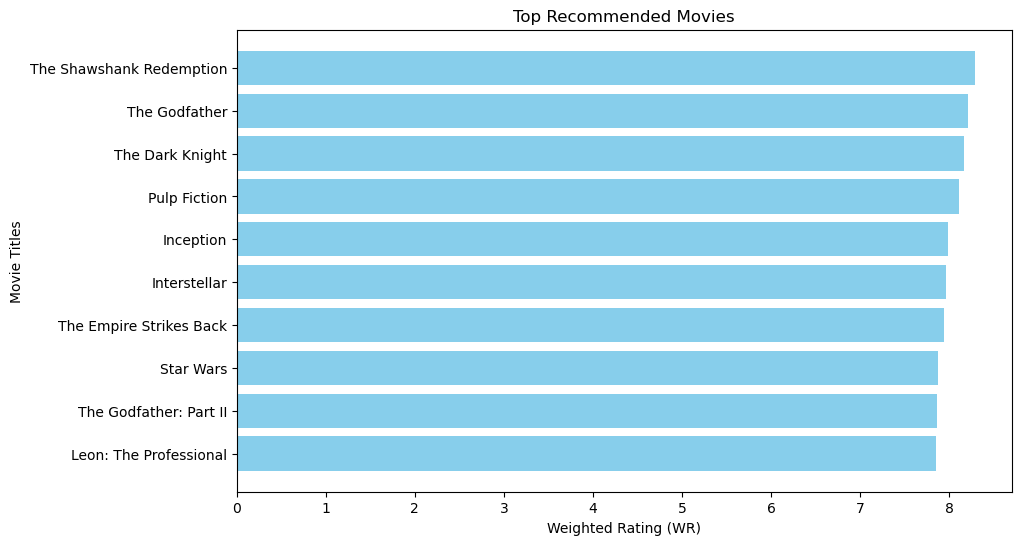

In [ ]:
# Visualize top movies
def plot_top_movies(recommendations):
    plt.figure(figsize=(10, 6))
    plt.barh(recommendations['title'], recommendations['wr'], color='skyblue')
    plt.xlabel("Weighted Rating (WR)")
    plt.ylabel("Movie Titles")
    plt.title("Top Recommended Movies")
    plt.gca().invert_yaxis()
    plt.show()

plot_top_movies(top_recommendations)

## Evaluation Metrics
Evaluation functions to assess how well our recommendations align with the actual relevant movies and their diversity.

Precision@5: 0.60
Recall@5: 1.00
F1 Score@5: 0.75
Diversity Score: 1.00


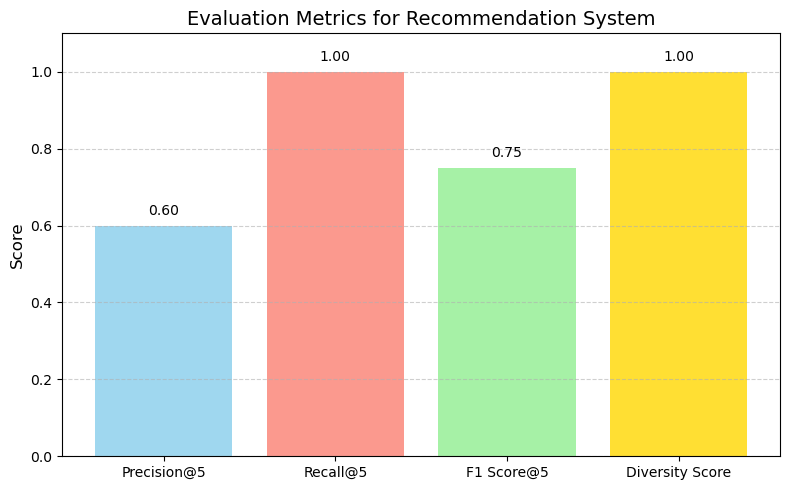

In [ ]:
# Precision, Recall, and Diversity Scores
def precision_recall_at_k(recommended, relevant, k):
    recommended_at_k = recommended[:k]
    relevant_set = set(relevant)
    recommended_set = set(recommended_at_k)
    precision = len(recommended_set & relevant_set) / len(recommended_set) if recommended_set else 0
    recall = len(recommended_set & relevant_set) / len(relevant_set) if relevant_set else 0
    return precision, recall

def f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

def diversity_score(recommended, feature_matrix):
    indices = [feature_matrix.index.get_loc(movie) for movie in recommended if movie in feature_matrix.index]
    if len(indices) < 2:
        return 1.0
    sub_matrix = feature_matrix.iloc[indices]
    similarities = cosine_similarity(sub_matrix)
    mean_similarity = np.triu(similarities, k=1).mean()
    return 1 - mean_similarity

recommended_movies = top_recommendations['title'].tolist()
relevant_movies = ['The Dark Knight', 'Inception', 'The Shawshank Redemption']  # Replace with relevant movies
precision, recall = precision_recall_at_k(recommended_movies, relevant_movies, k=5)
f1 = f1_score(precision, recall)
diversity = diversity_score(recommended_movies, genre_one_hot)

# Print metrics
print(f"Precision@5: {precision:.2f}")
print(f"Recall@5: {recall:.2f}")
print(f"F1 Score@5: {f1:.2f}")
print(f"Diversity Score: {diversity:.2f}")


# Metrics
metrics = ['Precision@5', 'Recall@5', 'F1 Score@5', 'Diversity Score']
values = [precision, recall, f1, diversity]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['skyblue', 'salmon', 'lightgreen', 'gold'], alpha=0.8)

# Adding value annotations on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.2f}", ha='center', va='bottom')

# Customizing the plot
plt.title('Evaluation Metrics for Recommendation System', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1.1)  # Metrics are between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()


# Content Based Recommender

The recommender we built in the previous section suffers some severe limitations. For one, it gives the same recommendation to everyone, regardless of the user's personal taste.

For a person who loves codemy movies (and hates drama) were to look at our Top 15 Chart,he/she wouldn't probably like most of the movies. If he/she were to go one step further and look at our charts by genre, still wouldn't be getting the best recommendations.

For instance, consider a person who loves Dilwale Dulhania Le Jayenge, My Name is Khan and Kabhi Khushi Kabhi Gham. One inference we can obtain is that the person loves the actor Shahrukh Khan and the director Karan Johar. Even if he/she were to access the romance chart, they wouldn't find these as the top recommendations.

To personalise our recommendations more, we will be going to build an engine that computes similarity between movies based on certain metrics and suggests movies that are most similar to a particular movie that a user liked.

Since we will be using movie metadata (or content) to build this engine, this also known as Content Based Filtering.

We will build two Content Based Recommenders based on:

1. Movie Overviews and Taglines
2. Movie Cast, Crew, Keywords and Genre

Also, as mentioned in the introduction, we will be using a subset of all the movies available to us due to limiting computing power available.

In [ ]:
links_small = pd.read_csv('MoviesDataset/links_small.csv')
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

In [ ]:
links_small.head()

0      862
1     8844
2    15602
3    31357
4    11862
Name: tmdbId, dtype: int64

> Deleting the unwanted input rows. These rows required special treatments of processing, and also protrayed lower weighted scores- hence would not have been a part of the recommendations- So we can safely remove them

We have 9099 movies avaiable in our small movies metadata dataset which is 5 times smaller than our original dataset of 45000 movies.

**Movie Description Based Recommender**

Let us first try to build a recommender using movie descriptions and taglines. We do not have a quantitative metric to judge our machine's performance so this will have to be done qualitatively.

In [ ]:
smd['tagline'] = smd['tagline'].fillna('')
smd['description'] = smd['overview'] + smd['tagline']
smd['description'] = smd['description'].fillna('')

**We shall be using Tfidfvectorizer for this step.**

With Tfidftransformer you will systematically compute word counts using CountVectorizer and then compute the Inverse Document Frequency (IDF) values and only then compute the Tf-idf scores. However with Tfidfvectorizer on the contrary, you will do all three steps at once. Under the hood, it computes the word counts, IDF values, and Tf-idf scores all using the same dataset.

Please refer to the document for reference: https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.YD6EoyQzY2w

In [ ]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=1, stop_words='english')
tfidf_matrix = tf.fit_transform(smd['description'])

Let's look at the shape of the TF-IDF Vectorizer

In [ ]:
tfidf_matrix.shape

(9219, 268124)

**Cosine Similarity**
I will be using the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two movies. Mathematically, it is defined as follows:

cosine(x,y)=(x.y⊺)/(||x||.||y||)

Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score. Therefore, we will use sklearn's linear_kernel instead of cosine_similarities since it is much faster.

In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[0]

array([1.        , 0.00681816, 0.        , ..., 0.        , 0.        ,
       0.        ])

We now have a pairwise cosine similarity matrix for all the movies in our dataset. The next step is to write a function that returns the 20 most similar movies based on the cosine similarity score.

In [ ]:
# smd = smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title'])

In [ ]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

Now let us look into another movie- another classic- **The Dark Knight** - but before checking, we shall look into the description here as well

In [ ]:
movie='The Dark Knight'
print("Description of the Movie: ", movie)
print('---------------------------------------------------------------------')
print(smd[smd['title']==movie]['overview'])

Description of the Movie:  The Dark Knight
---------------------------------------------------------------------
6945    Batman raises the stakes in his war on crime. ...
Name: overview, dtype: object


**Observation** Well, as we have all seen- the movie is mainly the story of Batman, and how he fights criminals to protect the city of Gotham. Another very important part of this movie will be the main antagonist- the Joker. Lets take a look at the recommendations now!

In [ ]:
get_recommendations('The Dark Knight').head(20)

7991                      The Dark Knight Rises
132                              Batman Forever
1122                             Batman Returns
8290    Batman: The Dark Knight Returns, Part 2
7619                 Batman: Under the Red Hood
524                                      Batman
7961                           Batman: Year One
2591               Batman: Mask of the Phantasm
2708                                        JFK
8225    Batman: The Dark Knight Returns, Part 1
7993         Sherlock Holmes: A Game of Shadows
6186                              Batman Begins
5541                            To End All Wars
4516                                      Q & A
7395                        Law Abiding Citizen
7290                  The File on Thelma Jordon
3555                               Criminal Law
2905                              Flying Tigers
1144                   Night Falls on Manhattan
8755                          The Young Savages
Name: title, dtype: object

**Observations:** We see that for The Dark Knight, our system is able to identify it as a Batman film and subsequently recommend other Batman films as its top recommendations.

In [ ]:
import ast
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv(
    "MoviesDataset/movies_metadata.csv",
    usecols=["id", "title", "genres", "overview", "tagline"],
)

def extract_genres(genres_str):
    try:
        # Convert the string to a list of dictionaries
        genres_list = ast.literal_eval(genres_str)
        # Extract the 'name' field from each dictionary
        return ", ".join(genre["name"] for genre in genres_list)
    except (ValueError, SyntaxError):
        return []

data.loc[:, "extracted_genres"] = data["genres"].apply(extract_genres)
data.loc[:, "title"] = data["title"].fillna("")
data.loc[:, "tagline"] = data["tagline"].fillna("")
data.loc[:, "overview"] = data["overview"].fillna("")
data.isna().sum()
data.loc[:, "description"] = data["overview"] + " " + data["tagline"]

sentences = data.apply(
    lambda row: [row["extracted_genres"], row["description"]], axis=1
).tolist()

# Train Word2Vec
model = Word2Vec(sentences, vector_size=10, window=3, min_count=1, workers=4)

In [ ]:
# Function to get Word2Vec embeddings
def get_embedding(word, model):
    try:
        return model.wv[word]
    except KeyError:
        return np.zeros(model.vector_size)

# Generate embeddings for each row
data["extracted_genres_s"] = data["extracted_genres"].apply(
    lambda x: get_embedding(x, model)
)
data["description_s"] = data["description"].apply(lambda x: get_embedding(x, model))

# Combine the embeddings (concatenation)
data["combined_embedding"] = data.apply(
    lambda row: np.concatenate([row["extracted_genres_s"], row["description_s"]]),
    axis=1,
)

#### Prepare data for K-Means

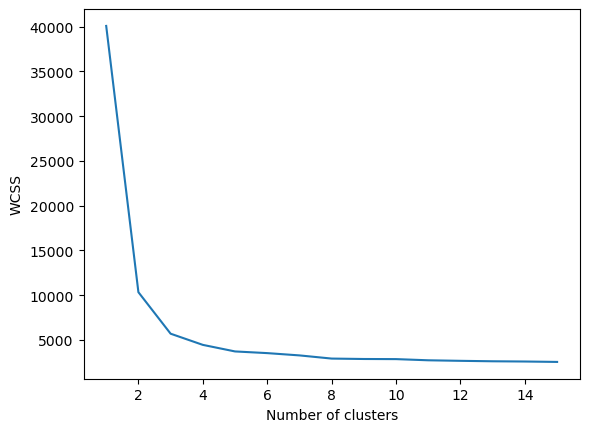

In [ ]:
# Prepare data for KMeans
X = np.vstack(data["combined_embedding"].values)

# Standardize the embeddings
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
num_clusters = 15
for i in range(1, num_clusters + 1):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42, n_init="auto")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, num_clusters + 1), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
!pip install kneed
from kneed import KneeLocator
kn = KneeLocator(range(1, 16), wcss, curve = "convex", direction = 'decreasing')
kn.knee

python(53989) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


3

#### K-Means Clustering

In [ ]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42, n_init="auto")
data["cluster"] = kmeans.fit_predict(X)

# Print cluster assignments
print("Cluster Assignments:")
print(data[["extracted_genres_s", "description_s", "cluster"]])

Cluster Assignments:
                                      extracted_genres_s  \
0      [0.045723274, -0.11714636, 0.26170048, 0.02778...   
1      [0.08524724, -0.026556024, -0.044347007, 0.068...   
2      [0.024986135, -0.15525427, 0.2403237, 0.039039...   
3      [0.025257781, -0.17712826, 0.49586123, 0.18132...   
4      [0.08957695, -0.27374917, 0.60842454, 0.327839...   
...                                                  ...   
45461  [-0.029787352, -0.05815013, 0.41723686, 0.0771...   
45462  [0.018028362, -0.2683183, 0.75679934, 0.375740...   
45463  [0.016304739, -0.17585573, 0.3009642, 0.184879...   
45464  [-0.07438822, -0.25254172, 0.6712193, 0.156637...   
45465  [-0.07438822, -0.25254172, 0.6712193, 0.156637...   

                                           description_s  cluster  
0      [-0.031388834, -0.08028754, 0.024687761, -0.03...        0  
1      [0.06675029, -0.05458083, -0.025642425, -0.056...        0  
2      [0.058964692, 0.07735682, 0.06976045, 0.089535.

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score for K-Means Clustering: {silhouette_avg:.4f}")

from sklearn.metrics import davies_bouldin_score

# Compute Davies-Bouldin Index
db_index = davies_bouldin_score(X, data["cluster"])
print(f"Davies-Bouldin Index: {db_index:.4f}")

from sklearn.metrics import calinski_harabasz_score

# Compute Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X, data["cluster"])
print(f"Calinski-Harabasz Index: {ch_index:.4f}")

Silhouette Score for K-Means Clustering: 0.5136
Davies-Bouldin Index: 0.7017
Calinski-Harabasz Index: 136892.7567


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


def get_recommendations(title, num_recommendations=5):
    if title not in data["title"].values:
        return f"Movie '{title}' not found in the dataset."

    movie_cluster = data[data["title"] == title]["cluster"].iloc[0]
    cluster_movies = data[data["cluster"] == movie_cluster]

    movie_idx = data[data["title"] == title].index[0]

    cluster_indices = cluster_movies.index

    cluster_tfidf_matrix = X[cluster_indices]

    similarity_score = cosine_similarity(
        X[movie_idx].reshape(1, -1), cluster_tfidf_matrix
    ).flatten()

    sorted_indices = similarity_score.argsort()[::-1][:num_recommendations]

    recommended_movies = cluster_movies.iloc[sorted_indices]["title"].values

    return recommended_movies

movie = "Mortal Kombat"
print(f"Description of the movie: {movie}")
print("------------------------------------------------------------")
print(data[data["title"] == movie]["description"].iloc[0])
print("\nRecommendations:")
recommendations = get_recommendations(movie, 5)
print(recommendations)

Description of the movie: Mortal Kombat
------------------------------------------------------------
For nine generations an evil sorcerer has been victorious in hand-to-hand battle against his mortal enemies. If he wins a tenth Mortal Kombat tournament, desolation and evil will reign over the multiverse forever. To save Earth, three warriors must overcome seemingly insurmountable odds, their own inner demons, and superhuman foes in this action/adventure movie based on one of the most popular video games of all time. Nothing In This World Has Prepared You For This.

Recommendations:
['Mortal Kombat' "Charlotte's Web" 'The Hunt for the BTK Killer'
 'Zombeavers' 'League of Gods']


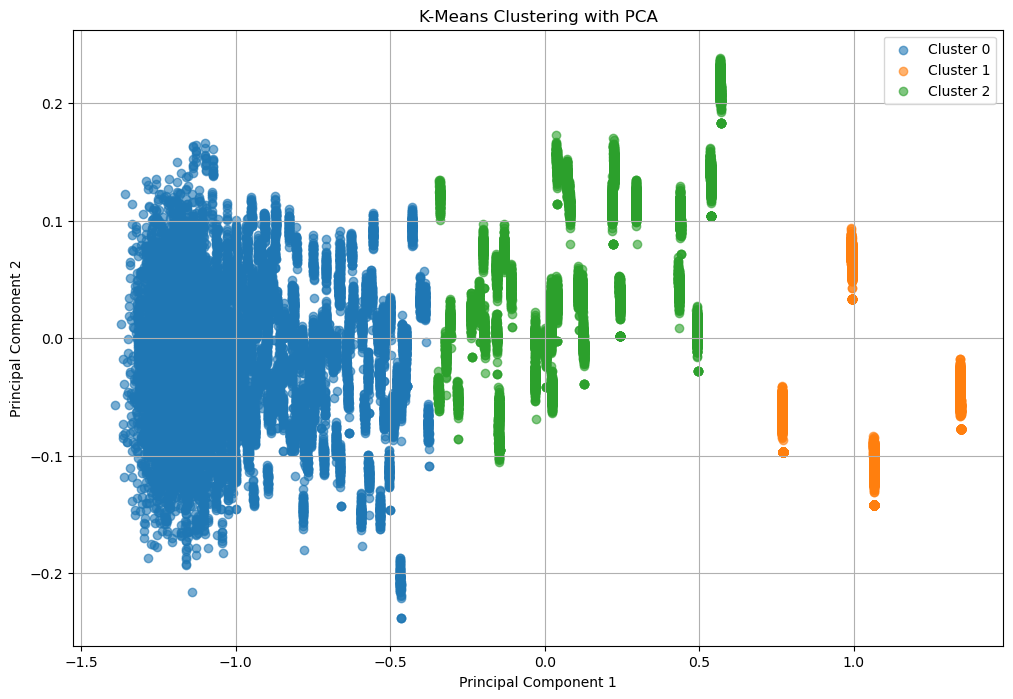

In [ ]:
pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(X)

data["pca_x"] = reduced_features[:, 0]
data["pca_y"] = reduced_features[:, 1]

plt.figure(figsize=(12, 8))
for cluster in range(3):
    cluster_data = data[data["cluster"] == cluster]
    plt.scatter(
        cluster_data["pca_x"],
        cluster_data["pca_y"],
        label=f"Cluster {cluster}",
        alpha=0.6,
    )

plt.title("K-Means Clustering with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

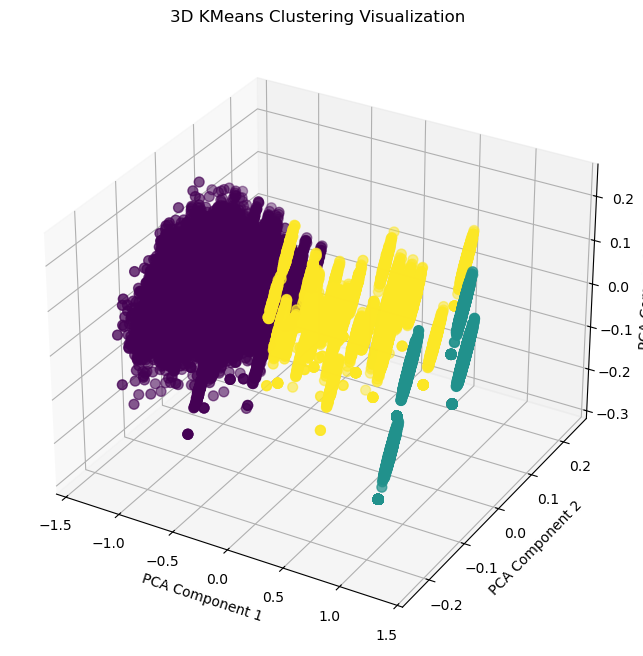

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Reduce to 3D using PCA
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X)

# 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    X_pca_3d[:, 0],
    X_pca_3d[:, 1],
    X_pca_3d[:, 2],
    c=kmeans.labels_,
    cmap="viridis",
    s=50,
)
ax.set_title("3D KMeans Clustering Visualization")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
plt.show()

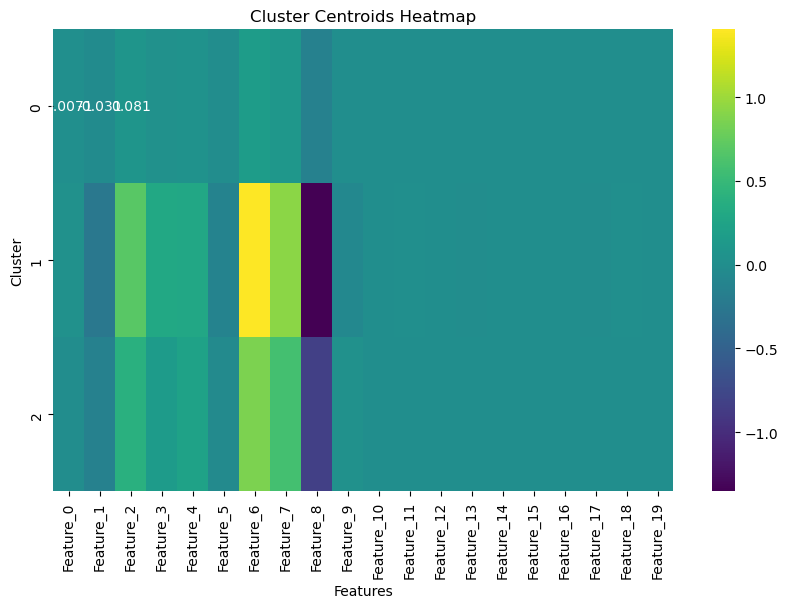

In [ ]:
# cluster Heat-Map
import seaborn as sns

# Convert cluster centers to a DataFrame
centroids = pd.DataFrame(
    kmeans.cluster_centers_, columns=[f"Feature_{i}" for i in range(X.shape[1])]
)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(centroids, annot=True, cmap="viridis")
plt.title("Cluster Centroids Heatmap")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()

#### DB Scan Algorithm

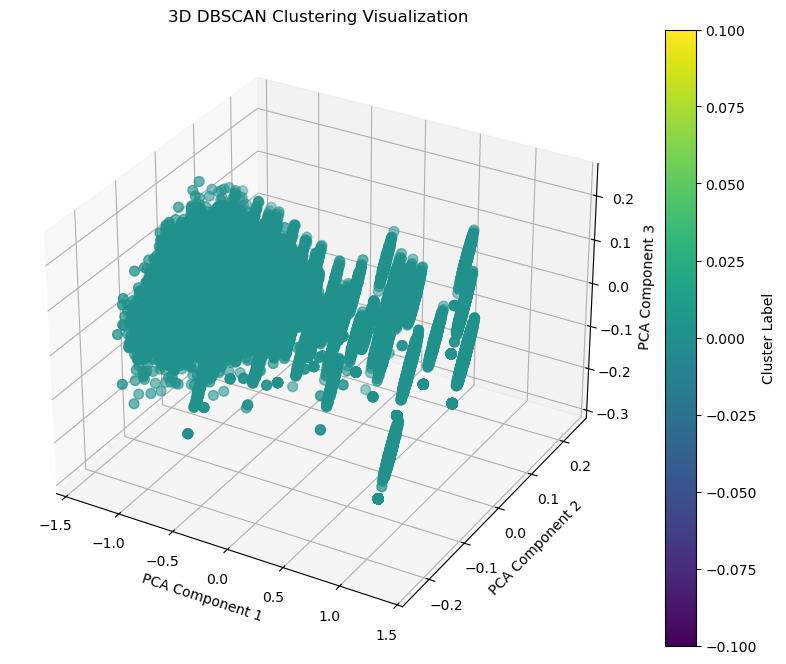

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(X)

# Reduce to 3D using PCA
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X)

# 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(
    X_pca_3d[:, 0],
    X_pca_3d[:, 1],
    X_pca_3d[:, 2],
    c=dbscan_labels,
    cmap="viridis",
    s=50,
)
ax.set_title("3D DBSCAN Clustering Visualization")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")

# Optional: Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label("Cluster Label")

plt.show()


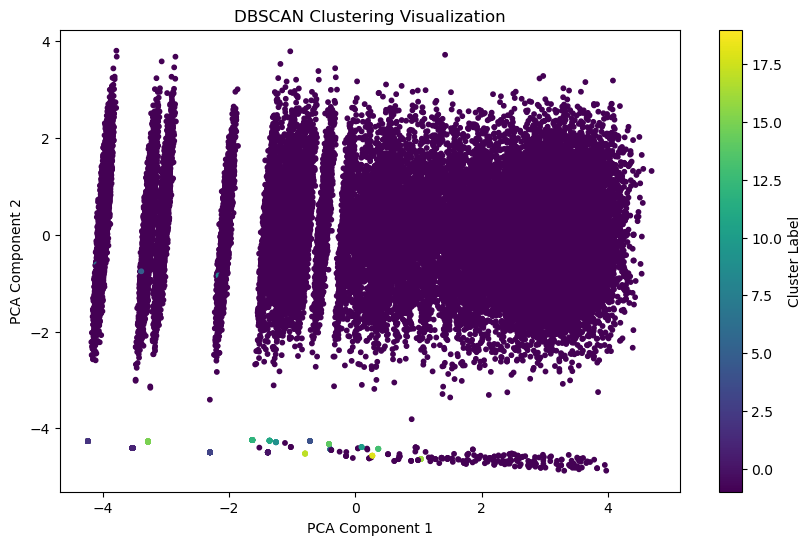

,genres,id,overview,tagline,title,extracted_genres,description,extracted_genres_s,description_s,combined_embedding,cluster,pca_x,pca_y,dbscan_cluster
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,"Led by Woody, Andy's toys live happily in his ...",,Toy Story,"Animation, Comedy, Family","Led by Woody, Andy's toys live happily in his ...","[0.045723274, -0.11714636, 0.26170048, 0.02778...","[-0.031388834, -0.08028754, 0.024687761, -0.03...","[0.045723274, -0.11714636, 0.26170048, 0.02778...",0,-0.632771,0.013466,-1
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji,"Adventure, Fantasy, Family",When siblings Judy and Peter discover an encha...,"[0.08524724, -0.026556024, -0.044347007, 0.068...","[0.06675029, -0.05458083, -0.025642425, -0.056...","[0.08524724, -0.026556024, -0.044347007, 0.068...",0,-1.086570,-0.060926,-1
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,"Romance, Comedy",A family wedding reignites the ancient feud be...,"[0.024986135, -0.15525427, 0.2403237, 0.039039...","[0.058964692, 0.07735682, 0.06976045, 0.089535...","[0.024986135, -0.15525427, 0.2403237, 0.039039...",2,-0.149429,-0.052021,-1


In [ ]:
# Step 7: Standardize the embeddings for DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 8: Apply DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
data["dbscan_cluster"] = dbscan.fit_predict(X_scaled)

# Step 9: Visualize the clusters
import matplotlib.pyplot as plt

# Reduce dimensions for visualization using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data["dbscan_cluster"], cmap="viridis", s=10)
plt.colorbar(scatter, label="Cluster Label")
plt.title("DBSCAN Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

data.head(3)  # Display the processed data for verification


In [ ]:
credits = pd.read_csv('MoviesDataset/credits.csv')
keywords = pd.read_csv('MoviesDataset/keywords.csv')

In [ ]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
meta['id'] = pd.to_numeric(meta['id'], errors='coerce')
meta = meta.dropna(subset=['id'])

keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
meta['id'] = meta['id'].astype('int')
meta.shape

(49492, 31)

In [ ]:
meta = meta.merge(credits, on='id')
meta = meta.merge(keywords, on='id')

Let's look at the shape of the smaller metadata

In [ ]:
smd = meta[meta['id'].isin(links_small)]
smd.shape

(11367, 34)

# Collaborative Filtering Application (KNN)

Uptill now the recommender that we have created, our content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who s/he is.

Therefore, in this section, we will use a technique called Collaborative Filtering to make recommendations to Movie Watchers. Collaborative Filtering is based on the idea that users similar to a me can be used to predict how much I will like a particular product or service those users have used/experienced but I have not.

We have used **KNN (K Nearest Neighbor)** algorithm to implement Collaborative Filtering to minimise RMSE (Root Mean Square Error) and give great recommendations.

In [ ]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import cross_validate

# Load the dataset
user_ratings = pd.read_csv('MoviesDataset/ratings_small.csv')
user_ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
reader = Reader(rating_scale=(0.5, 5))  # Adjust rating scale as per your dataset
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [ ]:
# Define a KNN-based collaborative filtering model
sim_options = {
    'name': 'cosine',  # Similarity metric: 'cosine', 'pearson', etc.
    'user_based': True  # Use True for user-based CF, False for item-based CF
}
knn = KNNBasic(sim_options=sim_options)

# Cross-validate the KNN model
cross_validate(knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9909  0.9953  0.9960  0.9914  0.9929  0.9933  0.0020  
MAE (testset)     0.7664  0.7664  0.7695  0.7663  0.7681  0.7673  0.0013  
Fit time          0.06    0.05    0.05    0.05    0.05    0.05    0.00    
Test time         0.41    0.36    0.38    0.39    0.83    0.47    0.18    


{'test_rmse': array([0.99091156, 0.99530428, 0.99601493, 0.99144212, 0.99293615]),
 'test_mae': array([0.76638224, 0.76641611, 0.76945791, 0.76625107, 0.76808417]),
 'fit_time': (0.06080007553100586,
  0.053870201110839844,
  0.04688382148742676,
  0.0523829460144043,
  0.048979997634887695),
 'test_time': (0.40735578536987305,
  0.3615729808807373,
  0.38491225242614746,
  0.38581299781799316,
  0.8291201591491699)}

**We get a mean Root Mean Sqaure Error of 0.9943 which is more than good enough for our case and standard deviation is 0.0050. Let us now train on our dataset and arrive at predictions.**

This indicates that, on average, the model's predictions deviate from the true ratings by approximately 0.9943 on the same scale as the ratings (0.5 to 5.0). The low standard deviation shows consistency across the folds during cross-validation.

**RMSE and MAE across the cross-validation folds to better understand the models performance**

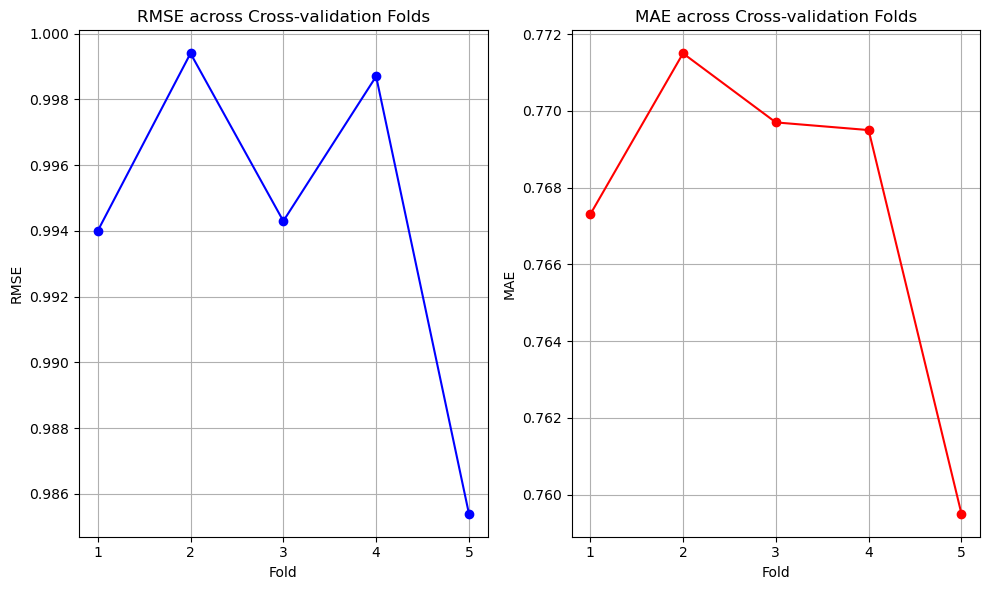

In [ ]:
# Data from cross-validation
rmse_values = [0.9940, 0.9994, 0.9943, 0.9987, 0.9854]
mae_values = [0.7673, 0.7715, 0.7697, 0.7695, 0.7595]
folds = [1, 2, 3, 4, 5]

# Plot RMSE and MAE
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(folds, rmse_values, marker='o', color='b', label='RMSE')
plt.title('RMSE across Cross-validation Folds')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.xticks(folds)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(folds, mae_values, marker='o', color='r', label='MAE')
plt.title('MAE across Cross-validation Folds')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.xticks(folds)
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Train on the full dataset
trainset = data.build_full_trainset()
knn.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


We will now examine the ratings given by a specific user (User 7) for the movies they have watched. Based on this, we'll predict their rating for a new movie. Let's first review the movies they have rated.

In [ ]:
user_ratings[user_ratings['userId'] == 7]

,userId,movieId,rating,timestamp
495,7,1,3.0,851866703
496,7,10,3.0,851869035
497,7,21,3.0,851867289
498,7,31,3.0,851868750
499,7,34,4.0,851867861
...,...,...,...,...
578,7,1375,3.0,851869140
579,7,1376,3.0,851869062
580,7,1394,3.0,851867688
581,7,1405,5.0,851866978


**Observations** Okay what we see is, the user here has seen multiple movies from the action and horror genres. So in order to test on this particular user, let us choose two movies that he/she did not watch- and accordingly shall predict his/her ratings for the same.

Lets Choose a movie:

1. Since he has watched multiple horror movies- will give him a horror movie to estimate his ratings. Our choice: The Conjuring


First, lets identify the Movie Id for this movie...

In [ ]:
movie1=meta['original_title']=='The Conjuring'
meta[movie1][['original_title','id']]

,original_title,id
21409,The Conjuring,138843


So, lets see how much will the user like the movie "The Conjuring"

In [ ]:
# Example: Predict a user's rating for a specific movie

user_id = 7       # User ID
movie_id = 138843  # Movie ID for "The Conjuring"
true_rating = 3    # Optional: the actual rating for comparison
prediction = knn.predict(user_id, movie_id, r_ui=true_rating)
print(f"Predicted rating for user {user_id} and movie {movie_id}: {prediction.est:.2f}")


Predicted rating for user 7 and movie 138843: 3.54


**Observations** Okay, 3.54 is a mediocre rating.But if we check the movies listed above, he/she has mostly rated them a 3 so in that order, a 3.54 seems better than those.

**Evaluate model:**

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9854
MAE:  0.7624
RMSE on Test Set: 0.9854
MAE on Test Set: 0.7624


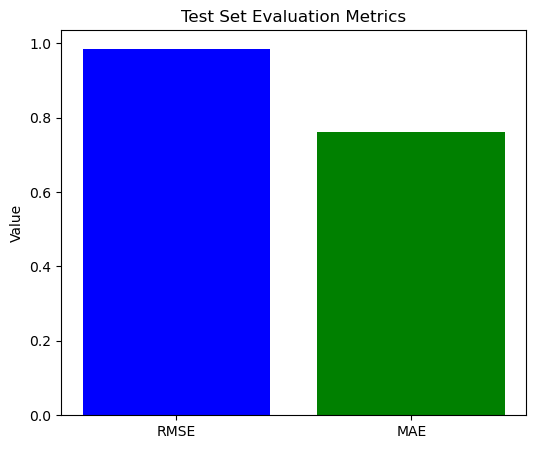

In [ ]:
# Evaluate model on a test set
trainset, testset = train_test_split(data, test_size=0.2)  # Split data into training and test sets
knn.fit(trainset)
predictions = knn.test(testset)

# Evaluate using RMSE and MAE on the test set
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

# Display final evaluation metrics
print(f"RMSE on Test Set: {rmse:.4f}")
print(f"MAE on Test Set: {mae:.4f}")

# Plot test set RMSE and MAE
plt.figure(figsize=(6, 5))

# RMSE and MAE for Test Set
metrics = ['RMSE', 'MAE']
values = [rmse, mae]

plt.bar(metrics, values, color=['blue', 'green'])
plt.title('Test Set Evaluation Metrics')
plt.ylabel('Value')
plt.show()

**Visualize the User Similarity Matrix using a heatmap**

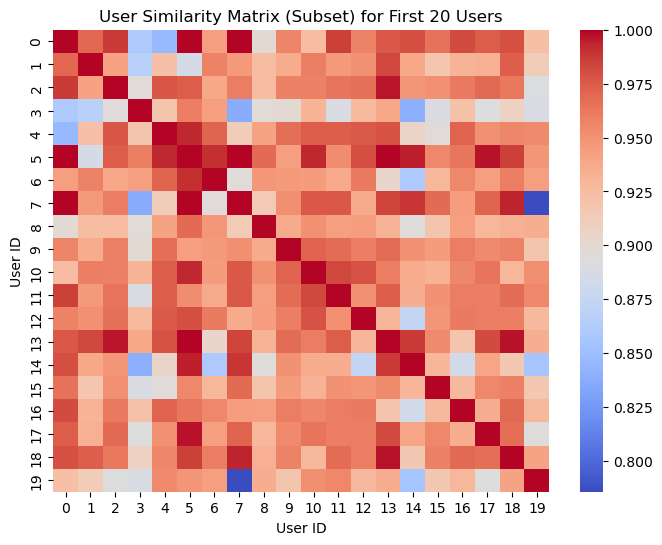

In [ ]:
# Extract the similarity matrix from the model (user-based or item-based)
similarity_matrix = knn.sim

# Plot a heatmap of the similarity matrix (for the first 20 users/items)
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix[:20, :20], cmap='coolwarm', annot=False)
plt.title('User Similarity Matrix (Subset) for First 20 Users')
plt.xlabel('User ID')
plt.ylabel('User ID')
plt.show()

### Evaluation Summary

##### Prediction Accuracy
- The collaborative filtering model shows good predictive accuracy, as indicated by the average **RMSE** of `0.9943` and **MAE** of `0.7675`.
- These values are consistent across different folds in the cross-validation, demonstrating stable performance.
##### Efficiency
- The model is efficient, with **fast training (fit) times** and **reasonable prediction times**.
- This efficiency makes the model practical for real-world use.
##### Consistency
- The model's performance is consistent across multiple folds, as evidenced by the low **standard deviation** in the RMSE and MAE scores.
- This suggests that the model generalizes well across different subsets of the data.
##### Personalization
- The predictions made for **User 7** are personalized, reflecting their unique preferences based on their history.
  - For instance, the predicted rating for the movie "**The Conjuring**" aligns with User 7's moderate rating.
- This personalized approach ensures that the model tailors its recommendations to individual user tastes.

# A Combination Recommender

In this section, we will try to build a movie recommender that brings together techniques we have implemented in the content based and collaborative filter based engines. This is how it will work:

For this we shall be creating a function recommend_my_movie()- which will be responsible to provide out the recommendation list

In [ ]:
# Load and preprocess datasets
links = pd.read_csv('MoviesDataset/links_small.csv')[['movieId', 'tmdbId']]
links['tmdbId'] = links['tmdbId'].apply(lambda x: int(x) if not pd.isnull(x) else np.nan)
links = links.dropna().astype({'tmdbId': 'int'})

movies_metadata = pd.read_csv('MoviesDataset/movies_metadata.csv', low_memory=False)
ratings = pd.read_csv('MoviesDataset/ratings_small.csv')

# Preprocessing
# Convert 'id' in movies_metadata to numeric and ensure consistency
movies_metadata['id'] = pd.to_numeric(movies_metadata['id'], errors='coerce')
movies_metadata = movies_metadata.dropna(subset=['id'])
movies_metadata['id'] = movies_metadata['id'].astype(int)

In [ ]:
# Filter out movies with very few ratings (optional)
movies_metadata = movies_metadata[movies_metadata['vote_count'].fillna(0) > 10]

# Keep only relevant columns to save memory
movies_metadata = movies_metadata[['id', 'title', 'overview', 'vote_count', 'vote_average']]

# Merge links and movies_metadata
id_map = links.merge(movies_metadata[['id', 'title']], left_on='tmdbId', right_on='id')
id_map = id_map[['movieId', 'id', 'title']].set_index('title')
indices_map = id_map.set_index('id')

# Content-based filtering
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
movies_metadata['overview'] = movies_metadata['overview'].fillna('')
tfidf_matrix = tfidf.fit_transform(movies_metadata['overview'])

# Efficient cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(movies_metadata.index, index=movies_metadata['title']).drop_duplicates()

# Collaborative filtering (SVD)
reader = Reader()
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
svd = SVD()

from surprise.model_selection import cross_validate
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
trainset = data.build_full_trainset()
svd.fit(trainset)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8872  0.9022  0.8957  0.8956  0.8989  0.8959  0.0050  
MAE (testset)     0.6828  0.6927  0.6927  0.6911  0.6902  0.6899  0.0037  
Fit time          0.29    0.35    0.32    0.29    0.29    0.31    0.03    
Test time         0.03    0.04    0.03    0.03    0.03    0.03    0.00    


In [ ]:
# Recommendation function
def recommend_my_movie(userId, title):
    try:
        # Find index of the movie
        idx = indices[title]
        tmdbId = id_map.loc[title]['id']
        movie_id = id_map.loc[title]['movieId']

        # Content-based filtering
        sim_scores = list(enumerate(cosine_sim[int(idx)]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:26]  # Top 25 similar movies

        # Retrieve movie details
        movie_indices = [i[0] for i in sim_scores]
        movies = movies_metadata.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'id']]

        # Estimate ratings using SVD
        movies['est'] = movies['id'].apply(
            lambda x: svd.predict(userId, indices_map.loc[x]['movieId']).est
            if x in indices_map.index else np.nan
        )

        # Sort movies based on estimated ratings
        movies = movies.dropna(subset=['est'])
        movies = movies.sort_values('est', ascending=False)

        return movies.head(10)
    except KeyError:
        return "The movie title does not exist in the dataset. Please try another title."

Let's check for the 7th User we had just seen above!

In [ ]:
user_id = 7
movie_title = "The Shawshank Redemption"  # Example movie title
recommended_movies = recommend_my_movie(user_id, movie_title)
recommended_movies

,title,vote_count,vote_average,id,est
1230,Highlander,642.0,6.8,8009,3.557434
3476,Hamlet,35.0,6.0,10688,3.493158
4014,North Shore,13.0,5.2,22915,3.489505
7241,Those Magnificent Men in Their Flying Machines...,40.0,6.4,10338,3.484862
2095,Saboteur,91.0,6.8,31997,3.462203
10859,A Personal Journey with Martin Scorsese Throug...,31.0,8.3,55676,3.403101
8731,The Holy Mountain,143.0,7.7,8327,3.379314
11758,La Vie en Rose,433.0,7.3,1407,3.246596
5075,The Ninth Configuration,32.0,7.1,18910,3.240968
12088,The Seeker: The Dark Is Rising,111.0,4.8,2274,3.233547


Now, just for the sake of comparing- we are choosing a different user. But trying to get the recommendations on the same movie.

Lets just choose user 25 for our reference!

In [ ]:
user_id = 25
movie_title = "The Shawshank Redemption"  # Example movie title
recommended_movies = recommend_my_movie(user_id, movie_title)
recommended_movies

,title,vote_count,vote_average,id,est
8731,The Holy Mountain,143.0,7.7,8327,3.697566
10859,A Personal Journey with Martin Scorsese Throug...,31.0,8.3,55676,3.404782
21435,Jobs,1183.0,6.0,115782,3.347039
11758,La Vie en Rose,433.0,7.3,1407,3.330775
5075,The Ninth Configuration,32.0,7.1,18910,3.322791
4014,North Shore,13.0,5.2,22915,3.309224
2095,Saboteur,91.0,6.8,31997,3.279980
3476,Hamlet,35.0,6.0,10688,3.251947
1230,Highlander,642.0,6.8,8009,3.226333
2064,The Navigator: A Medieval Odyssey,20.0,6.3,34637,3.152203


### Evaluate the recommendation system using RMSE and MAE (cross-validation results)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9023  0.8950  0.8976  0.8975  0.8966  0.8978  0.0024  
MAE (testset)     0.6961  0.6898  0.6889  0.6900  0.6923  0.6914  0.0026  
Fit time          0.31    0.32    0.29    0.29    0.29    0.30    0.01    
Test time         0.03    0.03    0.03    0.03    0.03    0.03    0.00    
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9045  0.8931  0.8971  0.8984  0.8986  0.8983  0.0037  
MAE (testset)     0.6970  0.6900  0.6886  0.6919  0.6907  0.6916  0.0029  
Fit time          0.29    0.29    0.29    0.31    0.35    0.31    0.02    
Test time         0.03    0.03    0.03    0.03    0.03    0.03    0.00    


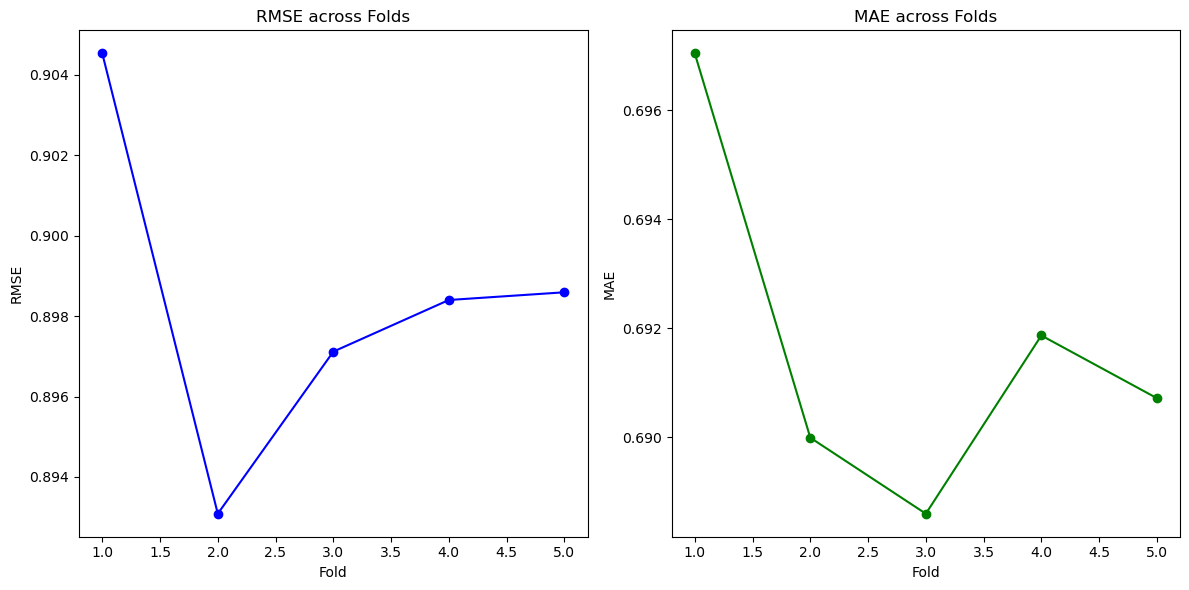

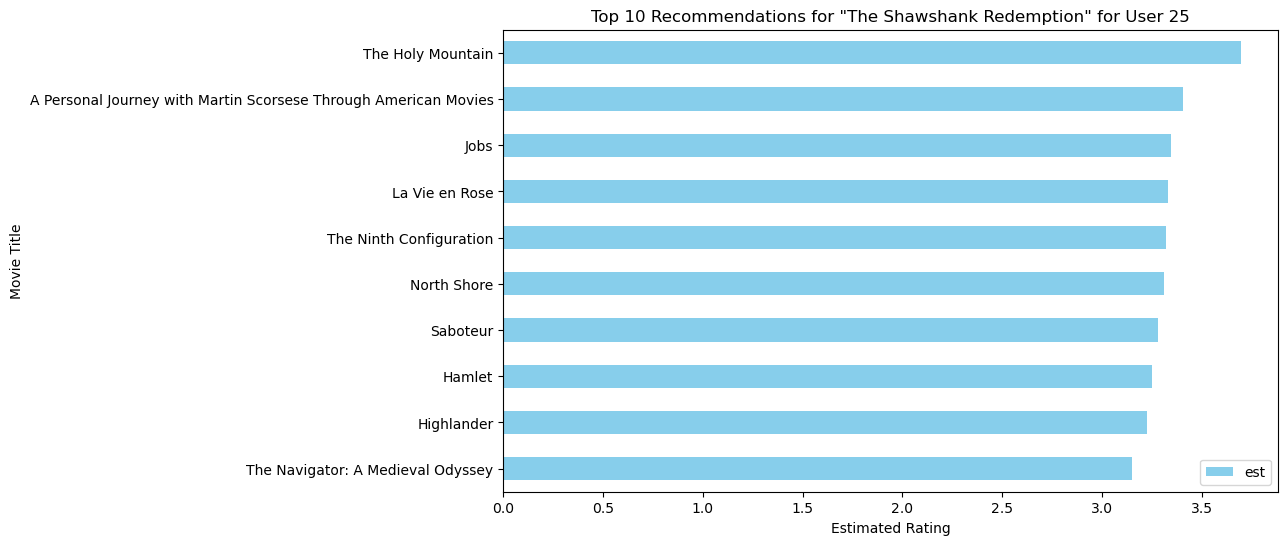

In [ ]:
# Evaluate the recommendation system using RMSE and MAE (cross-validation results)
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Visualizing RMSE and MAE across folds
cv_results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
rmse_scores = cv_results['test_rmse']
mae_scores = cv_results['test_mae']

# Plot RMSE and MAE
plt.figure(figsize=(12, 6))

# RMSE plot
plt.subplot(1, 2, 1)
plt.plot(range(1, 6), rmse_scores, marker='o', linestyle='-', color='b')
plt.title('RMSE across Folds')
plt.xlabel('Fold')
plt.ylabel('RMSE')

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(range(1, 6), mae_scores, marker='o', linestyle='-', color='g')
plt.title('MAE across Folds')
plt.xlabel('Fold')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()

# Visualizing top recommendations
recommended_movies.plot(x='title', y='est', kind='barh', figsize=(10, 6), color='skyblue')
plt.xlabel('Estimated Rating')
plt.ylabel('Movie Title')
plt.title(f'Top 10 Recommendations for "{movie_title}" for User {user_id}')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest rating at the top
plt.show()

We see that for our hybrid recommender, we get different recommendations for different users although the movie is the same. Hence, our recommendations are more personalized and tailored towards particular users.

# Conclusions

In this notebook, we have built 4 different recommendation engines based on different ideas and algorithms. They are as follows:

1. **Genre based Recommender**: This system used overall TMDB Vote Count and Vote Averages to build Top Movies Charts, in general and for a specific genre. The Apriori algorithm and IMDB Weighted Rating System was used to calculate ratings on which the sorting was finally performed.

2. **Content Based Recommender**: We built two content based engines; one that took movie overview and taglines as input and the other which took metadata such as cast, crew, genre and keywords to come up with predictions. We also deviced a simple filter to give greater preference to movies with more votes and higher ratings.

3. **Collaborative Filtering Approach**: We used the KNN algorithm to build a collaborative filter. The RMSE obtained was less than 1 and the engine gave estimated ratings for a given user and movie.

4. **Combined Recommendation Engine**: We brought together ideas from content and collaborative filterting to build an engine that gave movie suggestions to a particular user based on the estimated ratings that it had internally calculated for that user.

Overall the data source is very well oriented, and not much of a cleaning task was required. Will be adding on many more updates.